## 문제 1

위스콘신 유방암 데이터셋과 타이타닉 탑승자 데이터 셋을 KNN 알고리즘으로 분류분석을 수행하고 로지스틱의 경우와 결과를 비교하시오

각 데이터셋에 어떤 알고리즘을 적용하는 것이 더 좋은 성능을 기대할 수 있는지 결론을 ㄴ ㅐ시오.

> 단, 전처리 과정은 이전 수업과 동일하게 진행

### [1] 패키지 가져오기

In [20]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.classification import *
from helper.re import *

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

### [2] 위스콘신 유방암 데이터 가져오기

In [21]:
origin1 = my_read_excel("https://data.hossam.kr/mldata/breast-cancer-wisconsin.xlsx", index_col="id", categories=["diagnosis"],info = False)

#### (1) 이전과 동일한 전처리

In [22]:
df1 = my_labelling(origin1,'diagnosis')

#### (2) 데이터 분할

In [23]:
x_train, x_test, y_train, y_test = my_train_test_split(df1, 'diagnosis')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

#### (3) KNN분류 알고리즘 적용

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  8 | manhattan |             5 | uniform   |          0.938462 |
| 10 | manhattan |             7 | uniform   |          0.938462 |
| 11 | manhattan |             7 | distance  |          0.936264 |
|  9 | manhattan |             5 | distance  |           0.92967 |
|  4 | euclidean |             7 | uniform   |          0.927473 |
|  2 | euclidean |             5 | uniform   |          0.925275 |
|  5 | euclidean |             7 | distance  |          0.920879 |
|  6 | manhattan |             3 | uniform   |          0.920879 |
|  3 | euclidean |             5 | distance  |          0.918681 |
|  7 | manhattan |             3 | distance  |          0.918681 |
|  0 | euclidean |             3 | uniform   |          0.914286 |
|  1 | euclidean |             3 | distance  |         

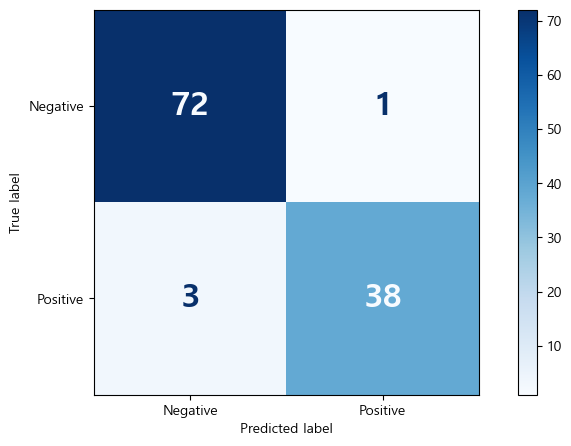

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


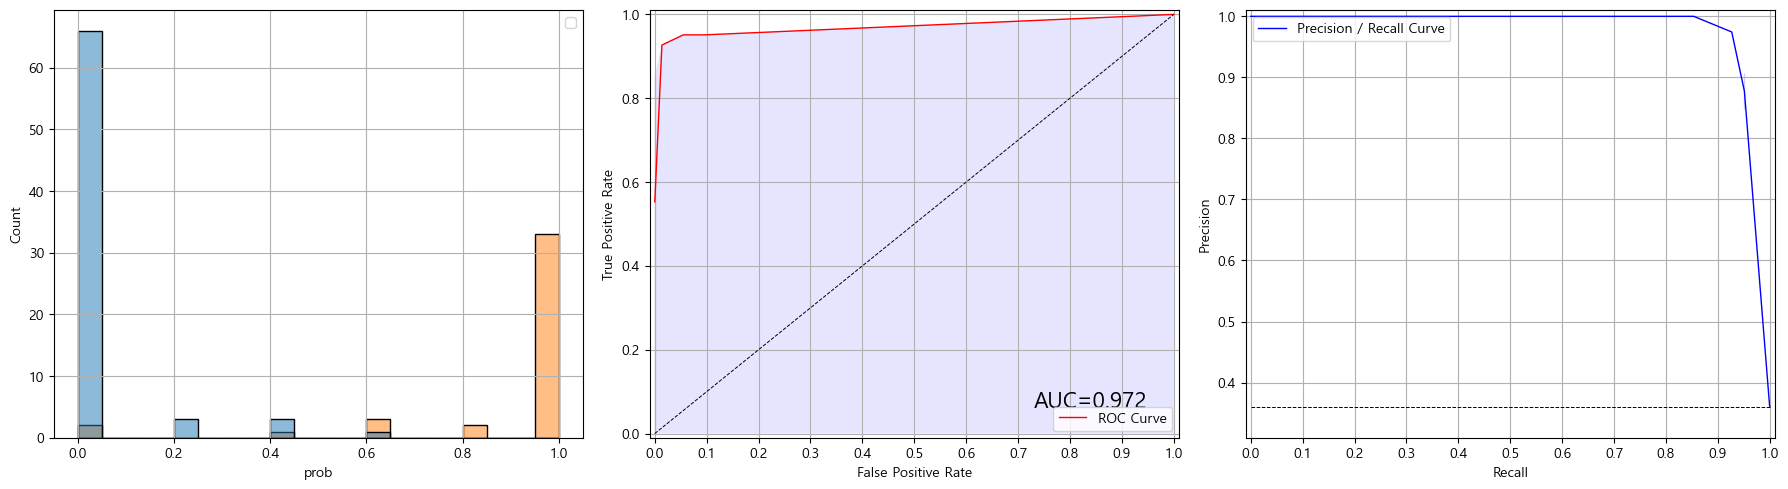


[학습곡선]


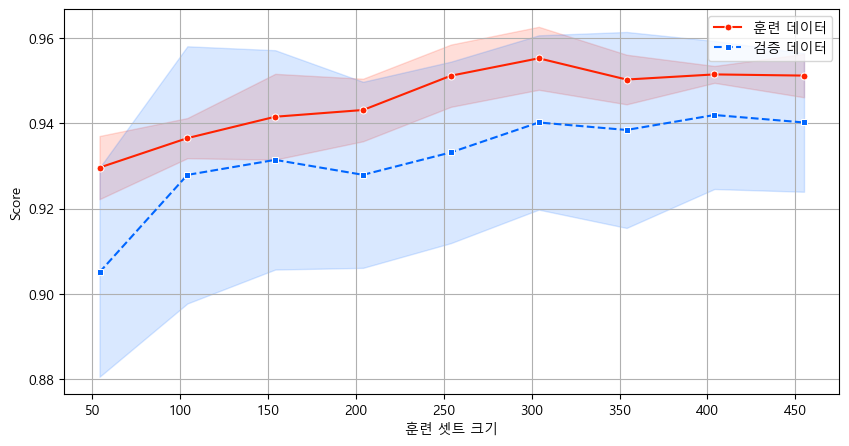

KNeighborsClassifier(metric='manhattan', n_jobs=-1)

In [24]:
my_knn_classification(x_train, y_train, x_test, y_test)

> 로지스틱 분석을 수행한 경우 정확도 `99%`, 재현률 `97%` 였으나 KNN은 정확도 `97%`, 재현률 `95%`를 보였다.
>
> 그러므로 이 데이터는 로지스틱 회귀가 KNN보다 더 좋은 성능을 보인다고 할 수 있다.

### [3] 타이타닉 데이터 가져오기

In [25]:
origin2 = my_read_excel("https://data.hossam.kr/edadata/titanic.xlsx", index_col='PassengerId', categories=['Survived', 'Pclass', 'Sex', 'Embarked'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  1309 non-null   category
 1   Pclass    1309 non-null   category
 2   Name      1309 non-null   object  
 3   Sex       1309 non-null   category
 4   Age       1046 non-null   float64 
 5   SibSp     1309 non-null   int64   
 6   Parch     1309 non-null   int64   
 7   Ticket    1309 non-null   object  
 8   Fare      1308 non-null   float64 
 9   Cabin     295 non-null    object  
 10  Embarked  1307 non-null   category
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 87.4+ KB
None

데이터프레임 상위 5개 행
+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|   PassengerId |   Survived |   Pclass | Name                                             

#### (1) 이전과 동일한 전처리

In [26]:
df2 = origin2.copy()
mean_age_df  = origin2[['Survived','Age']].groupby('Survived').mean()
for i in mean_age_df.index:
    mean_age = round(mean_age_df.loc[i]['Age'], 0)
    expr = (df2['Survived'] == i) & (df2['Age'].isna())
    df2.loc[expr, 'Age'] = df2.loc[expr, 'Age'].fillna(mean_age)
df2.loc[ df2['Age'] <= 16, "Age"] = 0
df2.loc[ (df2['Age'] > 16) & (df2['Age'] <= 32), "Age"] = 1
df2.loc[ (df2['Age'] > 32) & (df2['Age'] <= 48), "Age"] = 2
df2.loc[ (df2['Age'] > 48) & (df2['Age'] <= 64), "Age"] = 3
df2.loc[ df2['Age'] > 64, "Age"] = 4
df2['Has_Cabin'] = df2['Cabin'].apply(lambda x:  0 if type(x) == float else 1)
df2['Has_Cabin'].value_counts()
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1
df2['IsAlone'] = 0
df2.loc[df2['FamilySize'] == 1, 'IsAlone'] = 1
most_embarked_df = df2[['Survived','Embarked']].groupby('Survived').agg(Series.mode)
for i in most_embarked_df.index:
    most = most_embarked_df.loc[i]['Embarked']
    expr = (df2['Survived'] == i) & (df2['Embarked'].isna())
    df2.loc[expr, 'Embarked'] = df2.loc[expr, 'Embarked'].fillna(most)
mean_fare_df = df2[['Survived','Fare']].groupby('Survived').mean()
for i in mean_fare_df.index:
    mean_fare = mean_fare_df.loc[i]['Fare']
    expr = (df2['Survived'] == i) & (df2['Fare'].isna())
    df2.loc[expr, 'Fare'] = df2.loc[expr, 'Fare'].fillna(mean_fare)
df2['Title'] = df2['Name'].apply(get_title)
df3 = my_labelling(df2, 'Title', 'Embarked', 'Sex')
df3.loc[ df3['Fare'] <= 7.9, "Fare"] = 0
df3.loc[ (df2['Fare'] > 7.9) & (df3['Fare'] <= 14.5), "Fare"] = 1
df3.loc[ (df3['Fare'] > 14.5) & (df3['Fare'] <= 31.3), "Fare"] = 2
df3.loc[ df3['Fare'] > 31.3, "Fare"] = 3
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
df4 = df3.drop(drop_elements, axis = 1)

df4['Title'].unique()

array([2, 3, 1, 0, 4])

#### (2) 데이터 분할

In [27]:
df4['Survived'] = df4['Survived'].astype('int')
x_train, x_test, y_train, y_test = my_train_test_split(df4, yname='Survived')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1047, 9), (262, 9), (1047,), (262,))

#### (3) KNN분류 알고리즘 적용

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  8 | manhattan |             5 | uniform   |          0.841458 |
| 10 | manhattan |             7 | uniform   |          0.835735 |
|  6 | manhattan |             3 | uniform   |          0.834769 |
|  2 | euclidean |             5 | uniform   |           0.83095 |
| 11 | manhattan |             7 | distance  |          0.829027 |
|  4 | euclidean |             7 | uniform   |          0.828079 |
|  7 | manhattan |             3 | distance  |           0.82807 |
|  9 | manhattan |             5 | distance  |          0.828066 |
|  0 | euclidean |             3 | uniform   |          0.824265 |
|  5 | euclidean |             7 | distance  |          0.824233 |
|  3 | euclidean |             5 | distance  |           0.82329 |
|  1 | euclidean |             3 | distance  |         

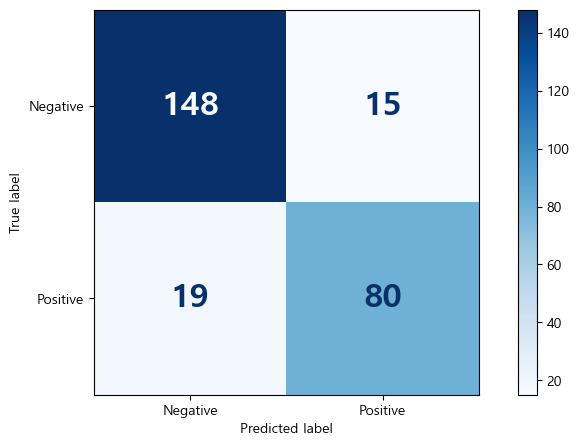


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


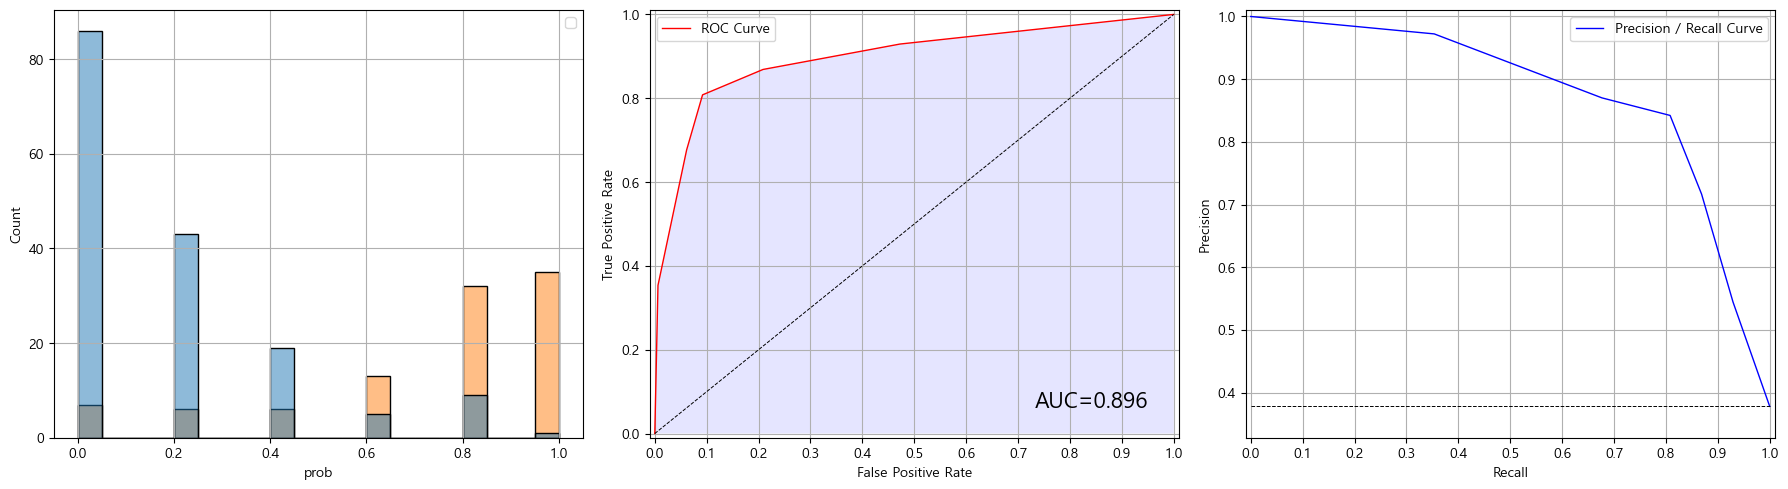


[학습곡선]


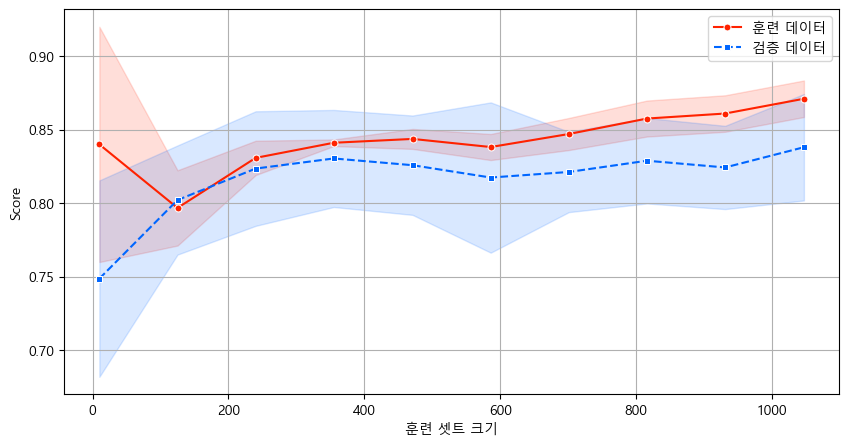

KNeighborsClassifier(metric='manhattan', n_jobs=-1)

In [28]:
my_knn_classification(x_train, y_train, x_test, y_test)

> 로지스틱 회귀분석 알고리즘을 적용하는 것이 더 좋은 성능을 기대할 수 있다.